## IMPORTING LIBRARIES:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
 ## Set visualization parameters
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [5]:
print("="*80)
print("E-COMMERCE FURNITURE DATASET - PYTHON ANALYSIS")
print("="*80)
print("\n✓ All libraries imported successfully!\n")

E-COMMERCE FURNITURE DATASET - PYTHON ANALYSIS

✓ All libraries imported successfully!



## LOAD THE DATASETS:

In [6]:
# Load the dataset
# NOTE: Update the file path according to your file location
df = pd.read_csv(r"C:\Users\yashw\OneDrive\Desktop\Data Sets\ecommerce_furniture_dataset_2024.csv")

print(f"\n✓ Dataset loaded successfully!")
print(f"  - Total rows: {df.shape[0]}")
print(f"  - Total columns: {df.shape[1]}")
print(f"  - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


✓ Dataset loaded successfully!
  - Total rows: 2000
  - Total columns: 5
  - Memory usage: 0.68 MB


In [8]:
# Display first few rows
print("\n" + "-"*80)
print("First 5 rows of the dataset:")
print("-"*80)
print(df.head())

# Display last few rows
print("\n" + "-"*80)
print("Last 5 rows of the dataset:")
print("-"*80)
print(df.tail())

# Display random sample
print("\n" + "-"*80)
print("Random 5 rows sample:")
print("-"*80)
print(df.sample(5))



--------------------------------------------------------------------------------
First 5 rows of the dataset:
--------------------------------------------------------------------------------
                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  

--------------------------------------------------------------------------------
Last 5 rows of the dataset:
-------------------------------------------------------------------------

## INITIAL DATA EXPLORATION:

In [10]:
# SECTION 3: INITIAL DATA EXPLORATION
# ============================================================================

print("\n" + "="*80)
print("STEP 2: INITIAL DATA EXPLORATION")
print("="*80)

# Dataset info
print("\n" + "-"*80)
print("Dataset Information:")
print("-"*80)
print(df.info())

# Column names and types
print("\n" + "-"*80)
print("Column Names and Data Types:")
print("-"*80)
for col in df.columns:
    print(f"  {col:20} : {df[col].dtype}")

# Check for missing values
print("\n" + "-"*80)
print("Missing Values Analysis:")
print("-"*80)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_percent.values
})
print(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
print("\n" + "-"*80)
print("Duplicate Rows Analysis:")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"  Total duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"  Percentage: {(duplicates/len(df)*100):.2f}%")

# Basic statistics
print("\n" + "-"*80)
print("Basic Statistical Summary:")
print("-"*80)
print(df.describe())



STEP 2: INITIAL DATA EXPLORATION

--------------------------------------------------------------------------------
Dataset Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB
None

--------------------------------------------------------------------------------
Column Names and Data Types:
--------------------------------------------------------------------------------
  productTitle         : object
  originalPrice        : object
  price                : object
  sold                 : int64


## DATA CLEANING:

In [11]:
# ============================================================================
# SECTION 4: DATA CLEANING
# ============================================================================

print("\n" + "="*80)
print("STEP 3: DATA CLEANING")
print("="*80)

# Create a copy for cleaning
df_clean = df.copy()

# 1. Handle originalPrice (too many missing values - 75%)
print("\n1. Handling 'originalPrice' column:")
print(f"   - Missing values: {df_clean['originalPrice'].isnull().sum()} ({df_clean['originalPrice'].isnull().sum()/len(df_clean)*100:.1f}%)")
print("   - Decision: DROP column (too many missing values)")
df_clean = df_clean.drop('originalPrice', axis=1)
print("   ✓ Column dropped successfully")

# 2. Handle missing values in tagText
print("\n2. Handling 'tagText' column:")
print(f"   - Missing values: {df_clean['tagText'].isnull().sum()}")
print("   - Decision: Fill with 'Free shipping' (most common value)")
df_clean['tagText'].fillna('Free shipping', inplace=True)
print("   ✓ Missing values filled")

# 3. Clean price column (remove $ and convert to float)
print("\n3. Cleaning 'price' column:")
print(f"   - Current type: {df_clean['price'].dtype}")
print("   - Sample values before cleaning:", df_clean['price'].head(3).values)
df_clean['price'] = df_clean['price'].replace('[\$,]', '', regex=True).astype(float)
print(f"   - Type after cleaning: {df_clean['price'].dtype}")
print("   - Sample values after cleaning:", df_clean['price'].head(3).values)
print("   ✓ Price column cleaned and converted to numeric")

# 4. Verify no remaining missing values
print("\n4. Final Missing Values Check:")
remaining_missing = df_clean.isnull().sum().sum()
print(f"   - Total missing values: {remaining_missing}")
if remaining_missing == 0:
    print("   ✓ All missing values handled successfully!")

# 5. Save cleaned data
df_clean.to_csv('cleaned_furniture_data.csv', index=False)
print("\n✓ Cleaned data saved to 'cleaned_furniture_data.csv'")

# Display cleaned data summary
print("\n" + "-"*80)
print("Cleaned Dataset Summary:")
print("-"*80)
print(f"  Shape: {df_clean.shape}")
print(f"  Columns: {list(df_clean.columns)}")
print("\nFirst 5 rows after cleaning:")
print(df_clean.head())


STEP 3: DATA CLEANING

1. Handling 'originalPrice' column:
   - Missing values: 1513 (75.6%)
   - Decision: DROP column (too many missing values)
   ✓ Column dropped successfully

2. Handling 'tagText' column:
   - Missing values: 3
   - Decision: Fill with 'Free shipping' (most common value)
   ✓ Missing values filled

3. Cleaning 'price' column:
   - Current type: object
   - Sample values before cleaning: ['$46.79' '$169.72' '$39.46']
   - Type after cleaning: float64
   - Sample values after cleaning: [ 46.79 169.72  39.46]
   ✓ Price column cleaned and converted to numeric

4. Final Missing Values Check:
   - Total missing values: 0
   ✓ All missing values handled successfully!

✓ Cleaned data saved to 'cleaned_furniture_data.csv'

--------------------------------------------------------------------------------
Cleaned Dataset Summary:
--------------------------------------------------------------------------------
  Shape: (2000, 4)
  Columns: ['productTitle', 'price', 'sold', '

In [12]:
# SECTION 5: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("STEP 4: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

# 1. Analyze tagText column
print("\n" + "-"*80)
print("1. Shipping Tag Analysis:")
print("-"*80)
print(f"\nUnique tag values: {df_clean['tagText'].nunique()}")
print("\nTop 10 shipping tags:")
print(df_clean['tagText'].value_counts().head(10))

# Simplify tagText into categories
print("\nSimplifying tagText categories...")
df_clean['tagText'] = df_clean['tagText'].apply(
    lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others'
)
print("\nNew tag distribution:")
print(df_clean['tagText'].value_counts())
print("✓ tagText simplified into 3 categories")

# 2. Statistical Analysis
print("\n" + "-"*80)
print("2. Statistical Analysis:")
print("-"*80)

print("\nPRICE STATISTICS:")
print(f"  Count       : {df_clean['price'].count()}")
print(f"  Mean        : ${df_clean['price'].mean():.2f}")
print(f"  Median      : ${df_clean['price'].median():.2f}")
print(f"  Std Dev     : ${df_clean['price'].std():.2f}")
print(f"  Min         : ${df_clean['price'].min():.2f}")
print(f"  Max         : ${df_clean['price'].max():.2f}")
print(f"  Range       : ${df_clean['price'].max() - df_clean['price'].min():.2f}")
print(f"  25th percentile: ${df_clean['price'].quantile(0.25):.2f}")
print(f"  75th percentile: ${df_clean['price'].quantile(0.75):.2f}")

print("\nSALES STATISTICS:")
print(f"  Count       : {df_clean['sold'].count()}")
print(f"  Mean        : {df_clean['sold'].mean():.2f} units")
print(f"  Median      : {df_clean['sold'].median():.0f} units")
print(f"  Std Dev     : {df_clean['sold'].std():.2f}")
print(f"  Min         : {df_clean['sold'].min()} units")
print(f"  Max         : {df_clean['sold'].max()} units")
print(f"  Total Sold  : {df_clean['sold'].sum()} units")
print(f"  25th percentile: {df_clean['sold'].quantile(0.25):.0f} units")
print(f"  75th percentile: {df_clean['sold'].quantile(0.75):.0f} units")

# Calculate revenue
df_clean['revenue'] = df_clean['price'] * df_clean['sold']

print("\nREVENUE STATISTICS:")
print(f"  Total Revenue    : ${df_clean['revenue'].sum():,.2f}")
print(f"  Avg Revenue/Prod : ${df_clean['revenue'].mean():.2f}")
print(f"  Median Revenue   : ${df_clean['revenue'].median():.2f}")
print(f"  Max Revenue      : ${df_clean['revenue'].max():,.2f}")

# Products with and without sales
products_with_sales = len(df_clean[df_clean['sold'] > 0])
products_without_sales = len(df_clean[df_clean['sold'] == 0])

print("\nPRODUCT PERFORMANCE:")
print(f"  Products with sales    : {products_with_sales} ({products_with_sales/len(df_clean)*100:.1f}%)")
print(f"  Products without sales : {products_without_sales} ({products_without_sales/len(df_clean)*100:.1f}%)")

# 3. Category-wise Analysis
print("\n" + "-"*80)
print("3. Analysis by Shipping Type:")
print("-"*80)
shipping_analysis = df_clean.groupby('tagText').agg({
    'productTitle': 'count',
    'sold': ['sum', 'mean', 'median'],
    'price': ['mean', 'median'],
    'revenue': 'sum'
}).round(2)
shipping_analysis.columns = ['Product Count', 'Total Sold', 'Avg Sold', 'Median Sold', 
                              'Avg Price', 'Median Price', 'Total Revenue']
print(shipping_analysis)



STEP 4: EXPLORATORY DATA ANALYSIS (EDA)

--------------------------------------------------------------------------------
1. Shipping Tag Analysis:
--------------------------------------------------------------------------------

Unique tag values: 100

Top 10 shipping tags:
tagText
Free shipping         1883
+Shipping: $5.09         9
+Shipping: $239.64       2
+Shipping: $97.54        2
+Shipping: $64.56        2
+Shipping: $75.99        2
+Shipping: $34.63        2
+Shipping: $55.98        2
+Shipping: $80.21        2
+Shipping: $2.91         2
Name: count, dtype: int64

Simplifying tagText categories...

New tag distribution:
tagText
Free shipping       1883
others               108
+Shipping: $5.09       9
Name: count, dtype: int64
✓ tagText simplified into 3 categories

--------------------------------------------------------------------------------
2. Statistical Analysis:
--------------------------------------------------------------------------------

PRICE STATISTICS:
  Coun

## DATA VISUALIZATIONS:


STEP 5: DATA VISUALIZATIONS

1. Creating Price Distribution plots...


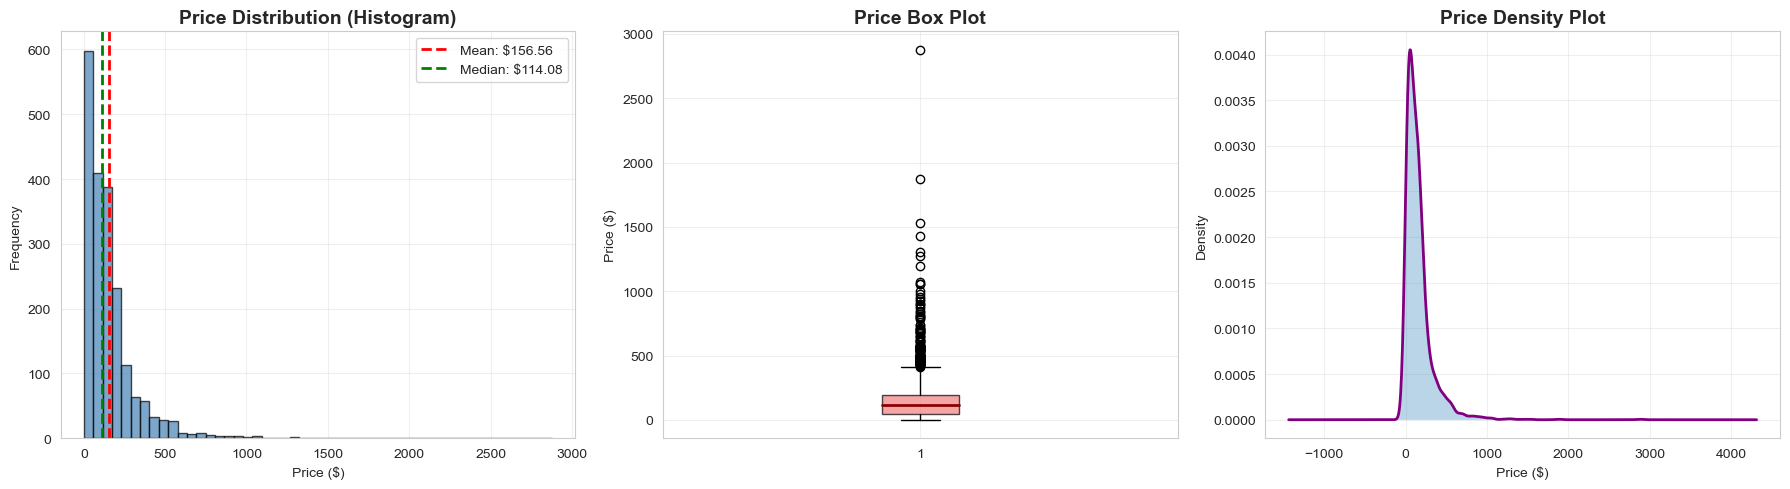

   ✓ Saved as '1_price_distribution.png'


In [34]:
# SECTION 6: DATA VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 5: DATA VISUALIZATIONS")
print("="*80)

# Visualization 1: Price Distribution
print("\n1. Creating Price Distribution plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram

axes[0].hist(df_clean['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution (Histogram)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_clean['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df_clean["price"].mean():.2f}')
axes[0].axvline(df_clean['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df_clean["price"].median():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot

axes[1].boxplot(df_clean['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='darkred', linewidth=2))
axes[1].set_title('Price Box Plot', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Price ($)')
axes[1].grid(alpha=0.3)

# KDE plot

df_clean['price'].plot(kind='density', ax=axes[2], color='purple', linewidth=2)
axes[2].set_title('Price Density Plot', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Density')
axes[2].grid(alpha=0.3)
axes[2].fill_between(axes[2].lines[0].get_xdata(), axes[2].lines[0].get_ydata(), alpha=0.3)

plt.tight_layout()
plt.savefig('1_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '1_price_distribution.png'")


2. Creating Sales Distribution plots...


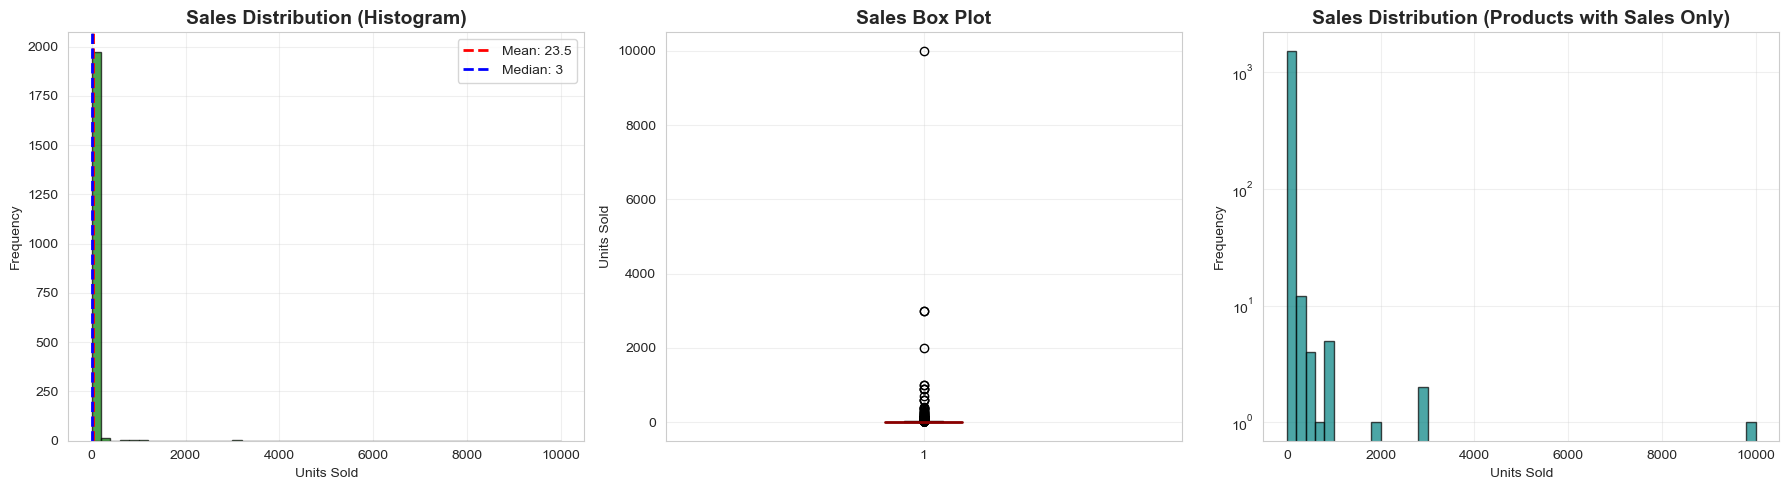

   ✓ Saved as '2_sales_distribution.png'


In [35]:
# Visualization 2: Sales Distribution

print("\n2. Creating Sales Distribution plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram

axes[0].hist(df_clean['sold'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title('Sales Distribution (Histogram)', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_clean['sold'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["sold"].mean():.1f}')
axes[0].axvline(df_clean['sold'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df_clean["sold"].median():.0f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot

axes[1].boxplot(df_clean['sold'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='orange', alpha=0.7),
                medianprops=dict(color='darkred', linewidth=2))
axes[1].set_title('Sales Box Plot', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Units Sold')
axes[1].grid(alpha=0.3)

# Log scale histogram (better for skewed data)

axes[2].hist(df_clean[df_clean['sold'] > 0]['sold'], bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[2].set_title('Sales Distribution (Products with Sales Only)', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Units Sold')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')
axes[2].grid(alpha=0.3)



plt.tight_layout()
plt.savefig('2_sales_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '2_sales_distribution.png'")


3. Creating Price vs Sales Scatter Plot...


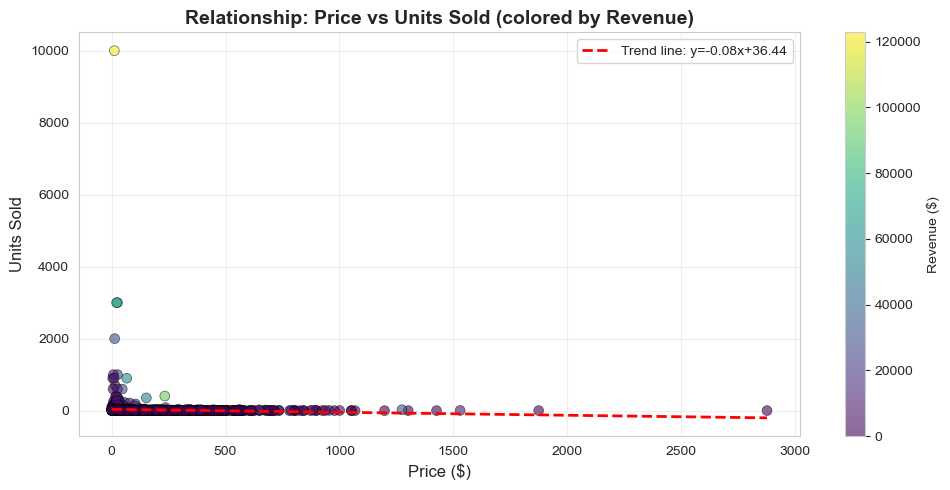

   ✓ Saved as '3_price_vs_sales.png'


In [36]:
# Visualization 3: Price vs Sales Scatter Plot

print("\n3. Creating Price vs Sales Scatter Plot...")
plt.figure(figsize=(10, 5))
scatter = plt.scatter(df_clean['price'], df_clean['sold'], 
                     c=df_clean['revenue'], cmap='viridis', 
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Revenue ($)')
plt.title('Relationship: Price vs Units Sold (colored by Revenue)', fontweight='bold', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.grid(alpha=0.3)

# Add trend line

z = np.polyfit(df_clean['price'], df_clean['sold'], 1)
p = np.poly1d(z)
plt.plot(df_clean['price'].sort_values(), p(df_clean['price'].sort_values()), 
         "r--", linewidth=2, label=f'Trend line: y={z[0]:.2f}x+{z[1]:.2f}')
plt.legend()

plt.tight_layout()
plt.savefig('3_price_vs_sales.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '3_price_vs_sales.png'")


4. Creating Shipping Tag Analysis plots...


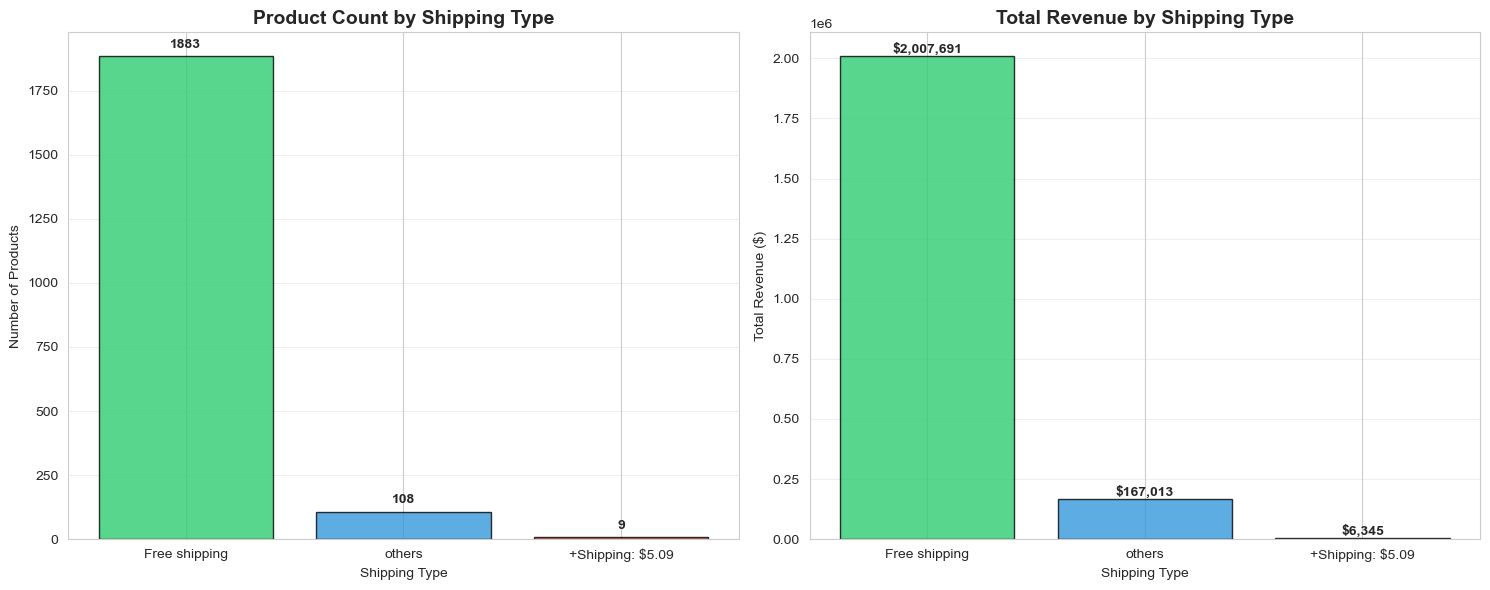

   ✓ Saved as '4_shipping_analysis.png'


In [33]:
# Visualization 4: Shipping Tag Analysis 

print("\n4. Creating Shipping Tag Analysis plots...")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
tag_counts = df_clean['tagText'].value_counts()
axes[0].bar(tag_counts.index, tag_counts.values, color=['#2ecc71', '#3498db', '#e74c3c'], edgecolor='black', alpha=0.8)
axes[0].set_title('Product Count by Shipping Type', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Shipping Type')
axes[0].set_ylabel('Number of Products')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(tag_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')
    
    
# Revenue by shipping type

revenue_by_tag = df_clean.groupby('tagText')['revenue'].sum().sort_values(ascending=False)
axes[1].bar(revenue_by_tag.index, revenue_by_tag.values, color=['#2ecc71', '#3498db', '#e74c3c'], edgecolor='black', alpha=0.8)
axes[1].set_title('Total Revenue by Shipping Type', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Shipping Type')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(revenue_by_tag.values):
    axes[1].text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('4_shipping_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '4_shipping_analysis.png'")



5. Creating Top 10 Products visualization...


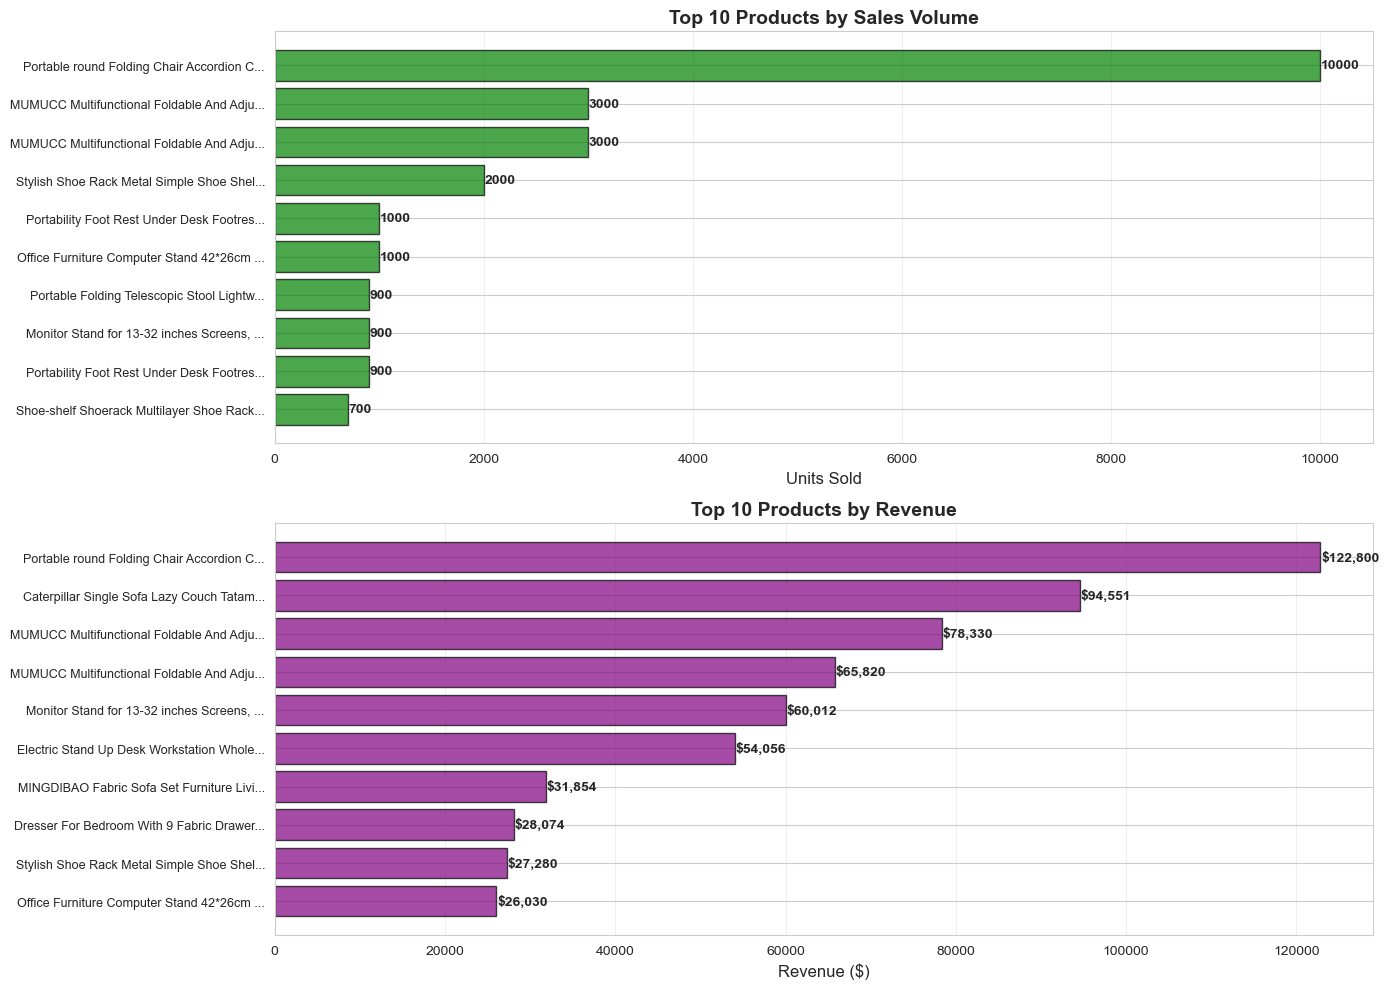

   ✓ Saved as '5_top_10_products.png'


In [32]:
# Visualization 5: Top 10 Products

print("\n5. Creating Top 10 Products visualization...")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 10 by sales

top_10_sales = df_clean.nlargest(10, 'sold')[['productTitle', 'sold', 'price']].sort_values('sold')
axes[0].barh(range(len(top_10_sales)), top_10_sales['sold'].values, color='green', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_10_sales)))
axes[0].set_yticklabels([title[:40] + '...' if len(title) > 40 else title for title in top_10_sales['productTitle']], fontsize=9)
axes[0].set_xlabel('Units Sold', fontsize=12)
axes[0].set_title('Top 10 Products by Sales Volume', fontweight='bold', fontsize=14)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_10_sales['sold'].values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')
    
# Top 10 by revenue

top_10_revenue = df_clean.nlargest(10, 'revenue')[['productTitle', 'revenue', 'price', 'sold']].sort_values('revenue')
axes[1].barh(range(len(top_10_revenue)), top_10_revenue['revenue'].values, color='purple', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(top_10_revenue)))
axes[1].set_yticklabels([title[:40] + '...' if len(title) > 40 else title for title in top_10_revenue['productTitle']], fontsize=9)
axes[1].set_xlabel('Revenue ($)', fontsize=12)
axes[1].set_title('Top 10 Products by Revenue', fontweight='bold', fontsize=14)
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_10_revenue['revenue'].values):
    axes[1].text(v + 100, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('5_top_10_products.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '5_top_10_products.png'")


6. Creating Correlation Heatmap...


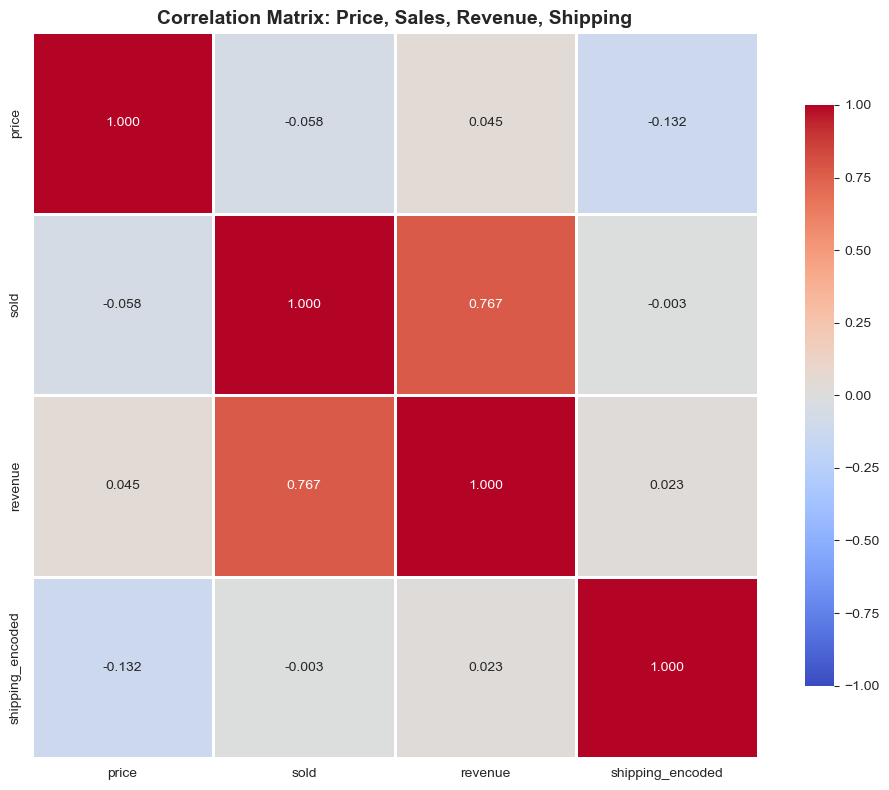

   ✓ Saved as '6_correlation_heatmap.png'

✓ All visualizations created and saved successfully!


In [37]:
# Visualization 6: Correlation Heatmap

print("\n6. Creating Correlation Heatmap...")
plt.figure(figsize=(10, 8))

# Prepare data for correlation

df_corr = df_clean[['price', 'sold', 'revenue']].copy()

# Add encoded tagText

le_temp = LabelEncoder()
df_corr['shipping_encoded'] = le_temp.fit_transform(df_clean['tagText'])

# Calculate correlation

correlation = df_corr.corr()

# Create heatmap

sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix: Price, Sales, Revenue, Shipping', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('6_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '6_correlation_heatmap.png'")

print("\n✓ All visualizations created and saved successfully!")

## FEATURE ENGINEERING

In [38]:
# SECTION 7: FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*80)
print("STEP 6: FEATURE ENGINEERING")
print("="*80)

# Create a copy for modeling
df_model = df_clean.copy()

print("\n1. Encoding categorical variables...")

# Encode tagText

le = LabelEncoder()
df_model['tagText_encoded'] = le.fit_transform(df_model['tagText'])
print(f"   ✓ tagText encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n2. Creating new features from text...")

# Extract features from product titles using TF-IDF

tfidf = TfidfVectorizer(max_features=50, stop_words='english', ngram_range=(1, 2))
title_features = tfidf.fit_transform(df_model['productTitle'])

# Convert to DataFrame

title_df = pd.DataFrame(
    title_features.toarray(),
    columns=[f'title_feat_{i}' for i in range(title_features.shape[1])]
)
print(f"   ✓ Created {title_features.shape[1]} TF-IDF features from product titles")

print("\n3. Creating additional numerical features...")

# Log transformed price (to handle skewness)

df_model['price_log'] = np.log1p(df_model['price'])

# Title length features

df_model['title_length'] = df_model['productTitle'].str.len()
df_model['title_word_count'] = df_model['productTitle'].str.split().str.len()

# Price categories

df_model['price_bin'] = pd.cut(df_model['price'], bins=5, labels=False)

print(f"   ✓ price_log: Log-transformed price")
print(f"   ✓ title_length: Number of characters in title")
print(f"   ✓ title_word_count: Number of words in title")
print(f"   ✓ price_bin: Price category (0-4)")

print("\n4. Combining all features...")

# Combine all features

X = pd.concat([
    df_model[['price', 'price_log', 'tagText_encoded', 'title_length', 'title_word_count', 'price_bin']],
    title_df
], axis=1)

y = df_model['sold']

print(f"\n✓ Feature matrix created:")
print(f"   - Shape: {X.shape}")
print(f"   - Total features: {X.shape[1]}")
print(f"   - Target variable (sold): {y.shape}")

print("\nFeature summary:")
print(X.describe())


STEP 6: FEATURE ENGINEERING

1. Encoding categorical variables...
   ✓ tagText encoded: {'+Shipping: $5.09': 0, 'Free shipping': 1, 'others': 2}

2. Creating new features from text...
   ✓ Created 50 TF-IDF features from product titles

3. Creating additional numerical features...
   ✓ price_log: Log-transformed price
   ✓ title_length: Number of characters in title
   ✓ title_word_count: Number of words in title
   ✓ price_bin: Price category (0-4)

4. Combining all features...

✓ Feature matrix created:
   - Shape: (2000, 56)
   - Total features: 56
   - Target variable (sold): (2000,)

Feature summary:
             price    price_log  tagText_encoded  title_length  \
count  2000.000000  2000.000000      2000.000000   2000.000000   
mean    156.560020     4.551478         1.049500    116.473500   
std     176.936735     1.118077         0.236807     15.633218   
min       0.990000     0.688135         0.000000     11.000000   
25%      48.530000     3.902578         1.000000    113.

## MACHINE LEARNING MODELS

In [39]:
# SECTION 8: MACHINE LEARNING MODELS
# ============================================================================

print("\n" + "="*80)
print("STEP 7: MACHINE LEARNING MODELS")
print("="*80)

print("\n1. Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"   ✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   ✓ Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Dictionary to store results
model_results = {}


STEP 7: MACHINE LEARNING MODELS

1. Splitting data into train and test sets...
   ✓ Training set: 1600 samples (80.0%)
   ✓ Testing set: 400 samples (20.0%)


### Linear Regression;

In [40]:
# Dictionary to store results

model_results = {}

In [41]:
# MODEL 1: Linear Regression

print("\n" + "-"*80)
print("2. Training Linear Regression Model...")
print("-"*80)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

model_results['Linear Regression'] = {
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'MAE': mae_lr,
    'R2': r2_lr,
    'predictions': y_pred_lr
}

print("\nLinear Regression Results:")
print(f"   Mean Squared Error (MSE)  : {mse_lr:,.2f}")
print(f"   Root Mean Squared Error   : {rmse_lr:.2f}")
print(f"   Mean Absolute Error (MAE) : {mae_lr:.2f}")
print(f"   R² Score                  : {r2_lr:.4f}")
print(f"   Adjusted R² Score         : {1 - (1-r2_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1):.4f}")



--------------------------------------------------------------------------------
2. Training Linear Regression Model...
--------------------------------------------------------------------------------

Linear Regression Results:
   Mean Squared Error (MSE)  : 8,922.04
   Root Mean Squared Error   : 94.46
   Mean Absolute Error (MAE) : 54.71
   R² Score                  : -0.6271
   Adjusted R² Score         : -0.8927


### Random Forest Regressor;

In [42]:
# MODEL 2: Random Forest Regressor

print("\n" + "-"*80)
print("3. Training Random Forest Model...")
print("-"*80)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

model_results['Random Forest'] = {
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R2': r2_rf,
    'predictions': y_pred_rf
}

print("\nRandom Forest Results:")
print(f"   Mean Squared Error (MSE)  : {mse_rf:,.2f}")
print(f"   Root Mean Squared Error   : {rmse_rf:.2f}")
print(f"   Mean Absolute Error (MAE) : {mae_rf:.2f}")
print(f"   R² Score                  : {r2_rf:.4f}")
print(f"   Adjusted R² Score         : {1 - (1-r2_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1):.4f}")


--------------------------------------------------------------------------------
3. Training Random Forest Model...
--------------------------------------------------------------------------------

Random Forest Results:
   Mean Squared Error (MSE)  : 8,708.57
   Root Mean Squared Error   : 93.32
   Mean Absolute Error (MAE) : 27.46
   R² Score                  : -0.5881
   Adjusted R² Score         : -0.8474


In [44]:
# MODEL 3: Gradient Boosting Regressor

print("\n" + "-"*80)
print("4. Training Gradient Boosting Model...")
print("-"*80)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

model_results['Gradient Boosting'] = {
    'MSE': mse_gb,
    'RMSE': rmse_gb,
    'MAE': mae_gb,
    'R2': r2_gb,
    'predictions': y_pred_gb
}

print("\nGradient Boosting Results:")
print(f"   Mean Squared Error (MSE)  : {mse_gb:,.2f}")
print(f"   Root Mean Squared Error   : {rmse_gb:.2f}")
print(f"   Mean Absolute Error (MAE) : {mae_gb:.2f}")
print(f"   R² Score                  : {r2_gb:.4f}")
print(f"   Adjusted R² Score         : {1 - (1-r2_gb)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1):.4f}")


--------------------------------------------------------------------------------
4. Training Gradient Boosting Model...
--------------------------------------------------------------------------------

Gradient Boosting Results:
   Mean Squared Error (MSE)  : 14,346.22
   Root Mean Squared Error   : 119.78
   Mean Absolute Error (MAE) : 29.09
   R² Score                  : -1.6162
   Adjusted R² Score         : -2.0434


### MODEL COMPARISON AND EVALUATION:

In [45]:
# SECTION 9: MODEL COMPARISON AND EVALUATION
# ============================================================================

print("\n" + "="*80)
print("STEP 8: MODEL COMPARISON AND EVALUATION")
print("="*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'MSE': [model_results[m]['MSE'] for m in model_results],
    'RMSE': [model_results[m]['RMSE'] for m in model_results],
    'MAE': [model_results[m]['MAE'] for m in model_results],
    'R² Score': [model_results[m]['R2'] for m in model_results]
})

print("\n" + "-"*80)
print("Model Performance Comparison:")
print("-"*80)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model']
best_r2 = comparison_df['R² Score'].max()

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")


STEP 8: MODEL COMPARISON AND EVALUATION

--------------------------------------------------------------------------------
Model Performance Comparison:
--------------------------------------------------------------------------------
            Model          MSE       RMSE       MAE  R² Score
Linear Regression  8922.035733  94.456528 54.710387 -0.627064
    Random Forest  8708.568387  93.319711 27.463647 -0.588135
Gradient Boosting 14346.215735 119.775689 29.088788 -1.616243

🏆 Best Performing Model: Random Forest
   R² Score: -0.5881



--------------------------------------------------------------------------------
Creating Model Comparison Visualizations...
--------------------------------------------------------------------------------


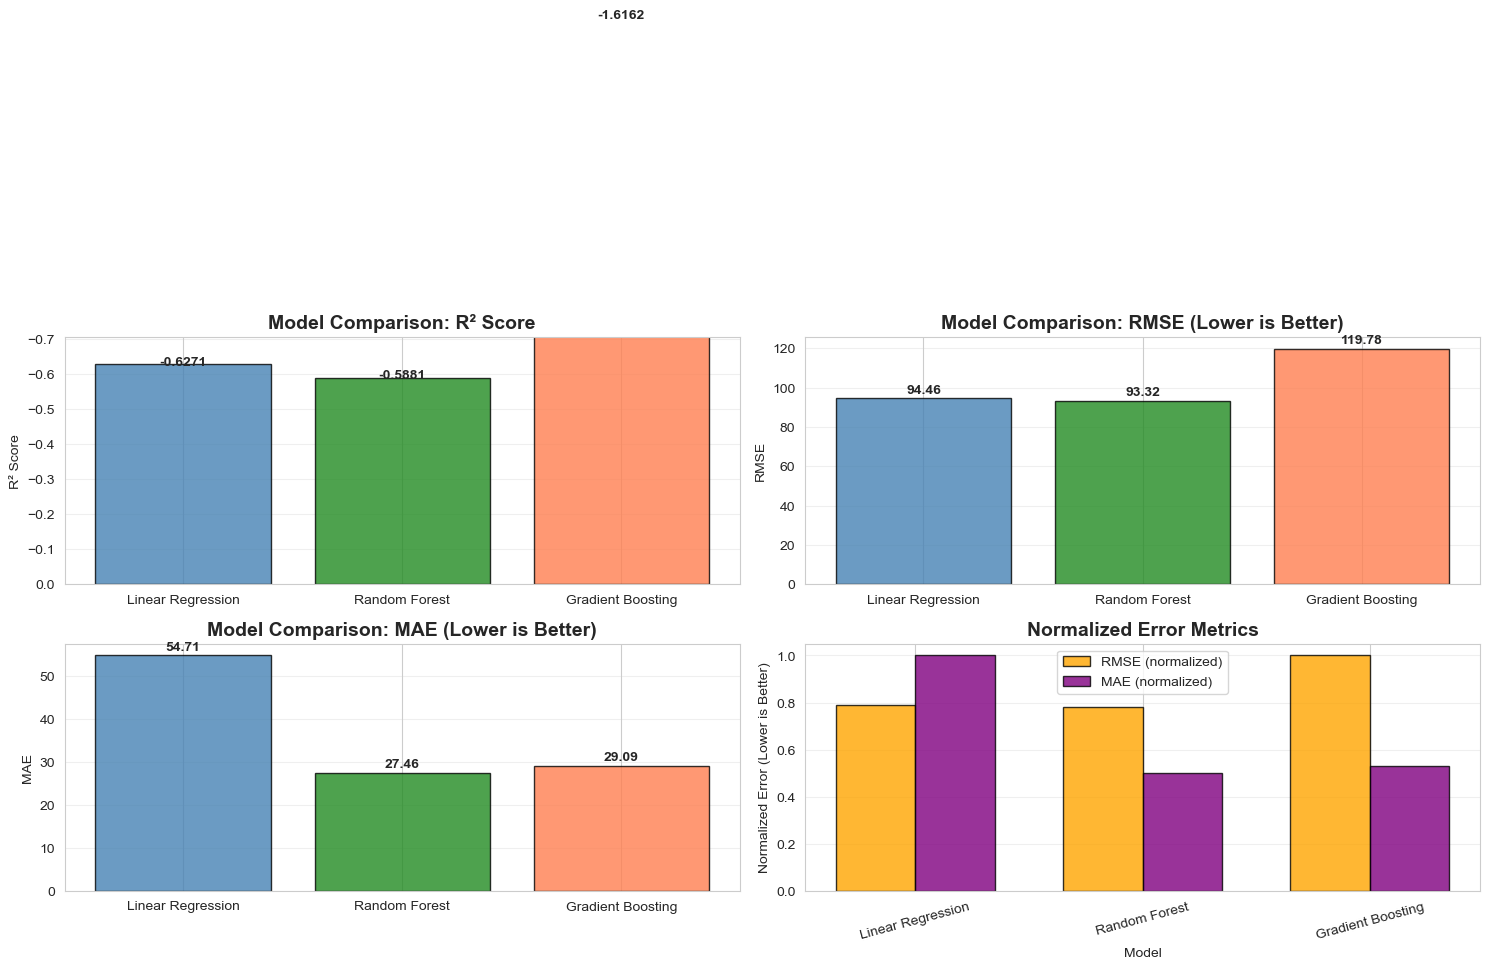

   ✓ Saved as '7_model_comparison.png'


In [46]:
# Visualization 7: Model Comparison

print("\n" + "-"*80)
print("Creating Model Comparison Visualizations...")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score comparison

axes[0, 0].bar(comparison_df['Model'], comparison_df['R² Score'], 
               color=['steelblue', 'forestgreen', 'coral'], edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Model Comparison: R² Score', fontweight='bold', fontsize=14)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, max(comparison_df['R² Score']) * 1.2)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['R² Score']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# RMSE comparison

axes[0, 1].bar(comparison_df['Model'], comparison_df['RMSE'], 
               color=['steelblue', 'forestgreen', 'coral'], edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Model Comparison: RMSE (Lower is Better)', fontweight='bold', fontsize=14)
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['RMSE']):
    axes[0, 1].text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# MAE comparison

axes[1, 0].bar(comparison_df['Model'], comparison_df['MAE'], 
               color=['steelblue', 'forestgreen', 'coral'], edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Model Comparison: MAE (Lower is Better)', fontweight='bold', fontsize=14)
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['MAE']):
    axes[1, 0].text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Multiple metrics comparison (normalized)

metrics_normalized = comparison_df[['Model', 'RMSE', 'MAE']].copy()
metrics_normalized['RMSE'] = metrics_normalized['RMSE'] / metrics_normalized['RMSE'].max()
metrics_normalized['MAE'] = metrics_normalized['MAE'] / metrics_normalized['MAE'].max()

x = np.arange(len(metrics_normalized))
width = 0.35

axes[1, 1].bar(x - width/2, metrics_normalized['RMSE'], width, label='RMSE (normalized)', 
               color='orange', edgecolor='black', alpha=0.8)
axes[1, 1].bar(x + width/2, metrics_normalized['MAE'], width, label='MAE (normalized)', 
               color='purple', edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Normalized Error (Lower is Better)')
axes[1, 1].set_title('Normalized Error Metrics', fontweight='bold', fontsize=14)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_normalized['Model'], rotation=15)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('7_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '7_model_comparison.png'")


Creating Actual vs Predicted plots...


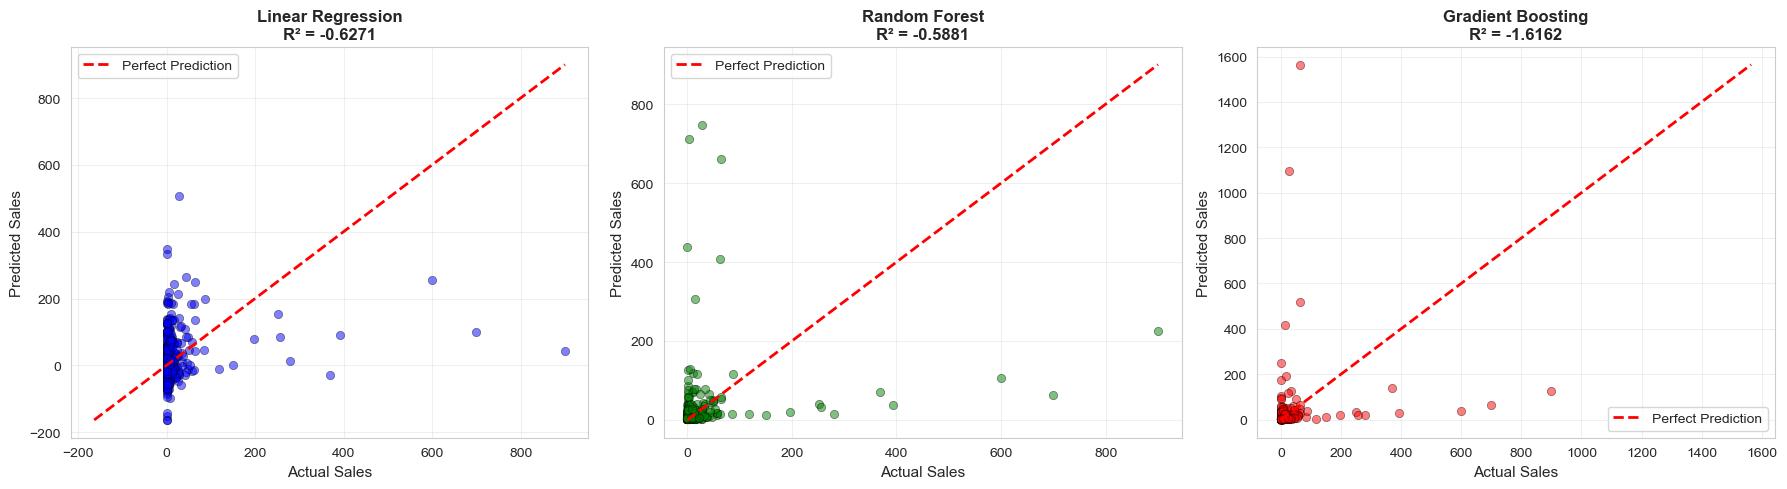

   ✓ Saved as '8_actual_vs_predicted.png'


In [47]:
# Visualization 8: Actual vs Predicted

print("\nCreating Actual vs Predicted plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_list = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
colors = ['blue', 'green', 'red']

for idx, (model_name, color) in enumerate(zip(models_list, colors)):
    y_pred = model_results[model_name]['predictions']
    
    axes[idx].scatter(y_test, y_pred, alpha=0.5, color=color, edgecolors='black', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    axes[idx].set_xlabel('Actual Sales', fontsize=11)
    axes[idx].set_ylabel('Predicted Sales', fontsize=11)
    axes[idx].set_title(f'{model_name}\nR² = {model_results[model_name]["R2"]:.4f}', 
                       fontweight='bold', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('8_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '8_actual_vs_predicted.png'")


Creating Residual Analysis plots...


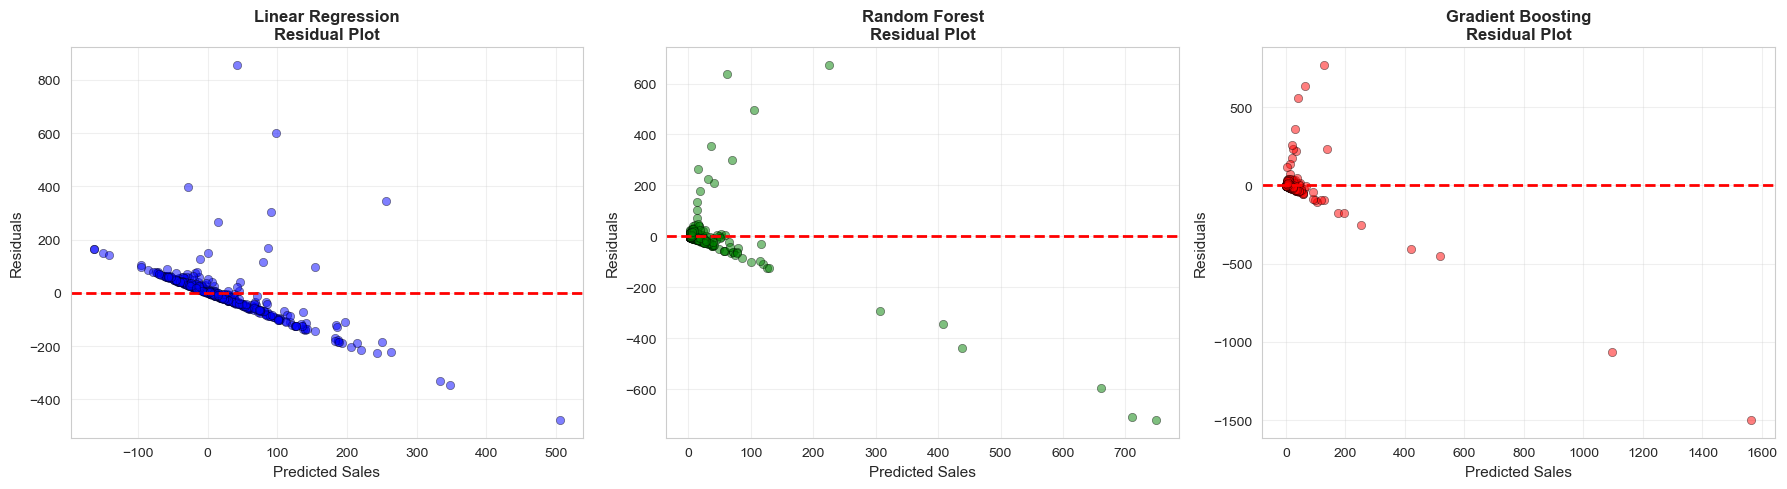

   ✓ Saved as '9_residual_analysis.png'


In [48]:
# Visualization 9: Residual Analysis

print("\nCreating Residual Analysis plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, color) in enumerate(zip(models_list, colors)):
    y_pred = model_results[model_name]['predictions']
    residuals = y_test - y_pred
    
    axes[idx].scatter(y_pred, residuals, alpha=0.5, color=color, edgecolors='black', linewidth=0.5)
    axes[idx].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[idx].set_xlabel('Predicted Sales', fontsize=11)
    axes[idx].set_ylabel('Residuals', fontsize=11)
    axes[idx].set_title(f'{model_name}\nResidual Plot', fontweight='bold', fontsize=12)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('9_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '9_residual_analysis.png'")


## FEATURE IMPORTANCE ANALYSIS:


STEP 9: FEATURE IMPORTANCE ANALYSIS

1. Random Forest Feature Importance:
--------------------------------------------------------------------------------

Top 15 Most Important Features:
         Feature  Importance
   title_feat_40    0.379000
    title_feat_5    0.228831
       price_log    0.156290
           price    0.126947
title_word_count    0.021186
   title_feat_37    0.017446
    title_length    0.014107
   title_feat_24    0.011502
   title_feat_22    0.008452
   title_feat_11    0.004660
   title_feat_19    0.004270
   title_feat_38    0.003394
   title_feat_41    0.003115
   title_feat_21    0.002859
   title_feat_27    0.002765

2. Creating Feature Importance Visualization...


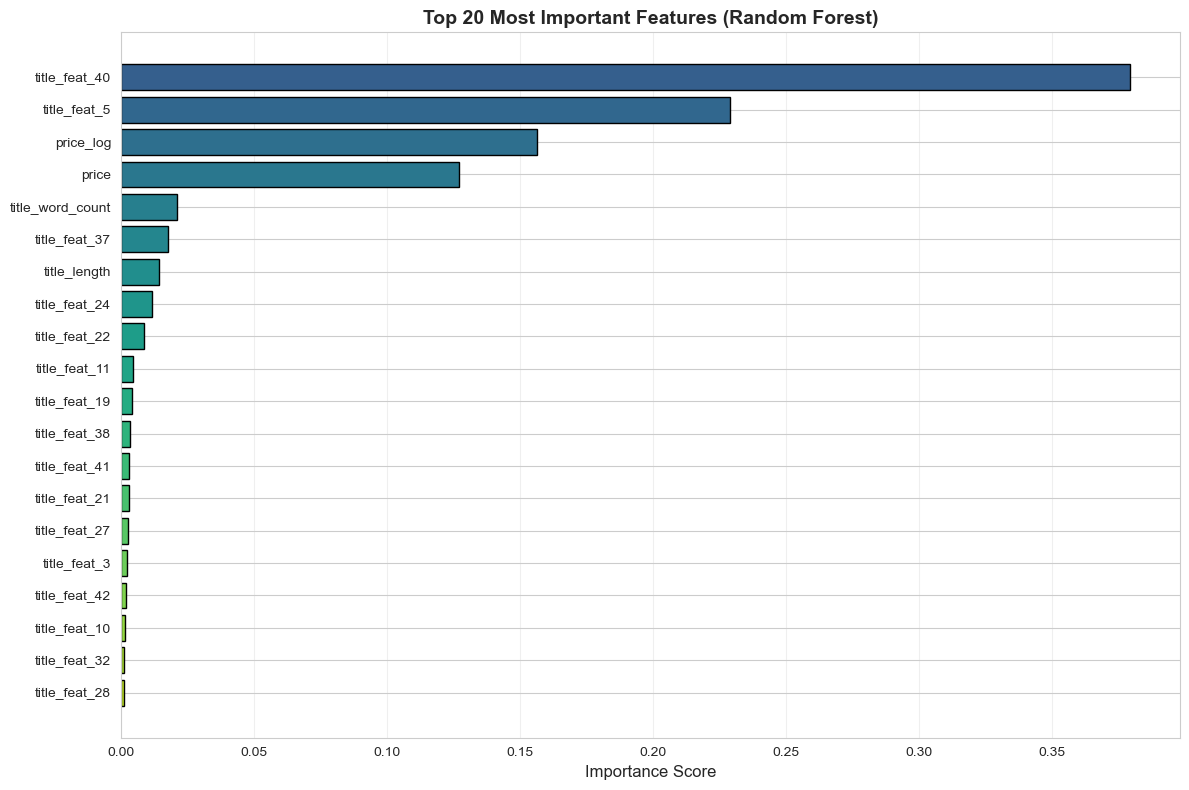

   ✓ Saved as '10_feature_importance.png'

3. Gradient Boosting Feature Importance:
--------------------------------------------------------------------------------

Top 15 Most Important Features (GB):
         Feature  Importance
       price_log    0.263410
           price    0.256780
   title_feat_40    0.143270
title_word_count    0.120710
    title_feat_5    0.098963
 tagText_encoded    0.045494
    title_length    0.043521
    title_feat_3    0.005466
   title_feat_41    0.004602
   title_feat_37    0.003894
   title_feat_32    0.002016
   title_feat_38    0.001905
   title_feat_19    0.001554
   title_feat_28    0.000989
   title_feat_16    0.000960


In [49]:
# SECTION 10: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("STEP 9: FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Random Forest Feature Importance

print("\n1. Random Forest Feature Importance:")
print("-"*80)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualization 10: Feature Importance

print("\n2. Creating Feature Importance Visualization...")
plt.figure(figsize=(12, 8))

top_features = feature_importance.head(20)
colors_grad = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))

plt.barh(range(len(top_features)), top_features['Importance'].values, color=colors_grad, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Most Important Features (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('10_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✓ Saved as '10_feature_importance.png'")

# Gradient Boosting Feature Importance

print("\n3. Gradient Boosting Feature Importance:")
print("-"*80)

gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (GB):")
print(gb_feature_importance.head(15).to_string(index=False))


## SAVE PREDICTIONS AND RESULTS:

In [50]:
## # SECTION 11: SAVE PREDICTIONS AND RESULTS
# ============================================================================

print("\n" + "="*80)
print("STEP 10: SAVING PREDICTIONS AND RESULTS")
print("="*80)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_Sales': y_test.values,
    'LR_Prediction': y_pred_lr,
    'RF_Prediction': y_pred_rf,
    'GB_Prediction': y_pred_gb,
    'LR_Error': y_test.values - y_pred_lr,
    'RF_Error': y_test.values - y_pred_rf,
    'GB_Error': y_test.values - y_pred_gb
})

predictions_df.to_csv('model_predictions.csv', index=False)
print("✓ Model predictions saved to 'model_predictions.csv'")

# Save model comparison
comparison_df.to_csv('model_comparison.csv', index=False)
print("✓ Model comparison saved to 'model_comparison.csv'")

# Save feature importance
feature_importance.to_csv('feature_importance_rf.csv', index=False)
print("✓ Feature importance saved to 'feature_importance_rf.csv'")

gb_feature_importance.to_csv('feature_importance_gb.csv', index=False)
print("✓ Feature importance (GB) saved to 'feature_importance_gb.csv'")


STEP 10: SAVING PREDICTIONS AND RESULTS
✓ Model predictions saved to 'model_predictions.csv'
✓ Model comparison saved to 'model_comparison.csv'
✓ Feature importance saved to 'feature_importance_rf.csv'
✓ Feature importance (GB) saved to 'feature_importance_gb.csv'
